# <center> Display graphs: RMSE curves and boxplots
    
### Authors: Rémi Leluc, François Portier, Johan Segers, Aigerim Zhuman

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from sklearn.linear_model import LinearRegression

## 1. Graphs for $[0,1]^d$ and $\mathbb{R}^d$

### 1.1 Load data

In [2]:
d = 2

if d==2:  
    # uniform
    a = 0.7 
    b = 1.25
    # normal
    a_n = 0.7
    b_n = 3.4
elif d==3:
    # uniform
    a = 0.65
    b = 1.
    # normal
    a_n = 0.7
    b_n = 2
elif d==4:
    # uniform
    a = 0.65
    b = 1.
    # normal
    a_n = 0.68
    b_n = 1.5
    
N_mc = np.ceil(np.logspace(1,4,20)).astype(np.int64)
I_mc_uni = np.load("results/synthetic/I_mc_sin_unif_d{}.npy".format(str(d)))
I_mc_nor = np.load("results/synthetic/I_mc_sin_normal_d{}.npy".format(str(d)))

I_cv_uni = np.load("results/synthetic/I_cv_sin_unif_d{}.npy".format(str(d)))
I_cv_nor = np.load("results/synthetic/I_cv_sin_normal_d{}.npy".format(str(d)))

dico_puiss = {2:1, 3:5/6, 4:3/4 }

### 1.2 Compute error curves

In [3]:
err_mc_uni = np.sqrt(np.mean((I_mc_uni**2),axis=1))
err_mc_nor = np.sqrt(np.mean((I_mc_nor**2),axis=1))

err_cv_uni = np.sqrt(np.mean((I_cv_uni**2),axis=1))
err_cv_nor = np.sqrt(np.mean((I_cv_nor**2),axis=1))

### 1.3 Plot RMSE curves

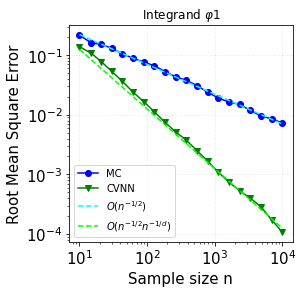

In [4]:
plt.figure(figsize=(4,4))

plt.plot(N_mc,err_mc_uni,color='blue',marker='o',label='MC')
plt.plot(N_mc,err_cv_uni,color='green',marker='v',label='CVNN')
plt.plot(N_mc,a/np.sqrt(N_mc),color='cyan',linestyle='--',label=r'$O(n^{-1/2})$')
plt.plot(N_mc,b/(N_mc**dico_puiss[d]),color='lime',linestyle='--',label=r'$O(n^{-1/2}n^{-1/d})$')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=10,loc='lower left')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Sample size n',fontsize=15)
plt.ylabel('Root Mean Square Error',fontsize=15)
plt.grid(alpha=0.2,linestyle='--')
plt.title(r'Integrand $\varphi 1$')
plt.show()

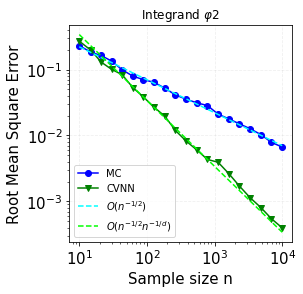

In [5]:
plt.figure(figsize=(4,4))

plt.plot(N_mc,err_mc_nor,color='blue',marker='o',label='MC')
plt.plot(N_mc,err_cv_nor,color='green',marker='v',label='CVNN')
plt.plot(N_mc,a_n/np.sqrt(N_mc),color='cyan',linestyle='--',label=r'$O(n^{-1/2})$')
plt.plot(N_mc,b_n/(N_mc**dico_puiss[d]),color='lime',linestyle='--',label=r'$O(n^{-1/2}n^{-1/d})$')
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=10,loc='lower left')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Sample size n',fontsize=15)
plt.ylabel('Root Mean Square Error',fontsize=15)
plt.grid(alpha=0.2,linestyle='--')
plt.title(r'Integrand $\varphi 2$')
plt.show()

## 2. Graphs for $O_3(\mathbb{R})$

### 2.1 Load data

In [6]:
k=2
I_mc = np.load('results/orthogonal/I_mc_O3_k{}.npy'.format(str(k)))
I_cv = np.load('results/orthogonal/I_cv_O3_k{}.npy'.format(str(k)))
if k==1:
    a = 1
    b = 2.1
    I_true = 0
elif k==2:
    a = 1.3
    b = 4.2
    I_true = 1
N_mc = np.ceil(np.logspace(1,4,20)).astype(np.int64)

### 2.2 Compute error curves

In [7]:
E_mc = (I_mc-I_true)**2
E_cv = (I_cv-I_true)**2

err_mc = np.sqrt(np.mean(E_mc,axis=0))
err_cv = np.sqrt(np.mean(E_cv,axis=0))

### 2.3 Plot RMSE curves

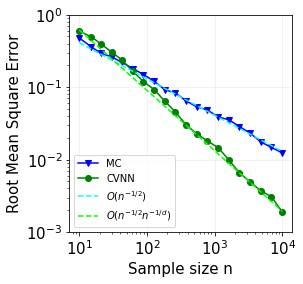

In [8]:
plt.figure(figsize=(4,4))
plt.plot(N_mc,err_mc,label='MC',marker='v',color='blue')
plt.plot(N_mc,err_cv,label='CVNN',marker='o',color='green')
plt.plot(N_mc,a/np.sqrt(N_mc),linestyle='--',label='$O(n^{-1/2})$',color='cyan')
plt.plot(N_mc,b/(N_mc)**(5/6),linestyle='--',label='$O(n^{-1/2}n^{-1/d})$',color='lime')
plt.legend(fontsize=10,loc='lower left')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Sample size n',fontsize=15)
plt.ylabel('Root Mean Square Error',fontsize=15)
plt.ylim(bottom=1e-3,top=1)
plt.grid(alpha=0.2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### 2.4 Plot boxplots

In [9]:
ind = [7,10,13,15,17,19]

val_cv = (I_cv[:,ind]-I_true)/I_true
val_mc = (I_mc[:,ind]-I_true)/I_true

portion = N_mc[ind]

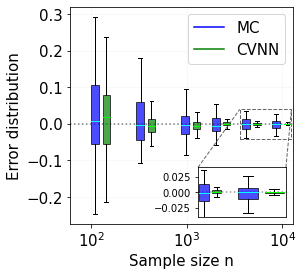

In [10]:
fig, ax = plt.subplots(figsize=(4,4))
# Display Boxplots
bp_mc = ax.boxplot(val_mc,
                   positions=portion - (portion/7.5).astype(int),
                   sym='',widths=portion/6,patch_artist=True)
bp_cv = ax.boxplot(val_cv,
                   positions=portion + (portion/7.5).astype(int),
                   sym='',widths=portion/5,patch_artist=True)
for patch in bp_mc['boxes']:
    patch.set_alpha(0.7)
    patch.set_facecolor('blue')
    
for patch in bp_mc['medians']:
    patch.set_color('cyan')
    
for patch in bp_cv['boxes']:
    patch.set_alpha(0.7)
    patch.set_facecolor('green')
    
for patch in bp_cv['medians']:
    patch.set_color('lime')

plt.plot([], c='blue', label='MC')
plt.plot([], c='green', label='CVNN')
plt.xticks(ticks=portion,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Sample size n',fontsize=15)
plt.ylabel('Error distribution',fontsize=15)
plt.xscale('symlog')
plt.xlim(left=60)
ax.axhline(y=0, linestyle=':', color='k', alpha=0.5)
axins = zoomed_inset_axes(ax, 1.7, loc=4,borderpad=0.7)  # zoom = 3, location = 4 (lower right)

bpz_mc = axins.boxplot(val_mc,
               positions=portion - (portion/7.5).astype(int),
               sym='',widths=portion/5,patch_artist=True)

pos_cv_zoom = portion + (portion/7.5).astype(int)
bpz_cv = axins.boxplot(val_cv,
               positions=pos_cv_zoom,
               sym='',widths=portion/5,patch_artist=True)

for patch in bpz_mc['boxes']:
    patch.set_alpha(0.7)
    patch.set_facecolor('blue')
    
for patch in bpz_mc['medians']:
    patch.set_color('cyan')
    
for patch in bpz_cv['boxes']:
    patch.set_alpha(0.7)
    patch.set_facecolor('green')
    
for patch in bpz_cv['medians']:
    patch.set_color('lime')
# sub region of the original image
axins.set_xlim(3600, 12500)
axins.set_ylim(-0.04,0.04)
for label in (axins.get_xticklabels() + axins.get_yticklabels()):
    label.set_fontsize(7)
axins.set_xticks([])
axins.tick_params(axis='y', which='major', labelsize=10)
mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.4",linestyle='--')
axins.axhline(y=0, linestyle=':', color='k', alpha=0.4)
ax.legend(loc='upper right',fontsize=15)
ax.grid(alpha=0.1)
plt.show()

## 3. Graphs for $\mathbb{S}^2$

### 3.1 Load data

In [11]:
#num = 'prod_cos'
#a = 0.17
#b = 0.9

#num = 'sum_cos'
#a = 5
#b = 13

num = 'exp'
a = 13
b = 24
if num=='exp':
    I_true = np.sinh(np.sqrt(2))*np.pi*np.sqrt(8)
else:
    I_true = (4*np.pi*np.sin(np.sqrt(3)))/np.sqrt(3)

# load results for naive-MC
I_mc = np.load('results/sphere/I_mc_{}.npy'.format(str(num)))
# load results for CVNN
I_cv = np.load('results/sphere/I_cv_{}.npy'.format(str(num)))
# range of sample size from n=10^1 to n=10^4
N_mc = np.ceil(np.logspace(1,4,20)).astype(np.int64)

### 3.2 Compute error curves

In [12]:
E_mc = (I_mc-I_true)**2
E_cv = (I_cv-I_true)**2

err_mc = np.sqrt(np.mean(E_mc,axis=0))
err_cv = np.sqrt(np.mean(E_cv,axis=0))

In [13]:
print('Sphere')
ols = LinearRegression()
ols.fit(X=np.log(N_mc).reshape(-1,1),y=np.log(err_mc))
coeff_mc = ols.coef_
ols.fit(X=np.log(N_mc).reshape(-1,1),y=np.log(err_cv))
coeff_cv = ols.coef_
print('coeff MC:',coeff_mc)
print('coeff CV:',coeff_cv)

Sphere
coeff MC: [-0.49944587]
coeff CV: [-1.02704527]


### 3.3 Plot RMSE curves

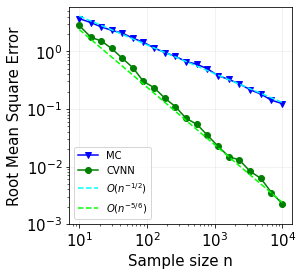

In [14]:
plt.figure(figsize=(4,4))
plt.plot(N_mc,err_mc,label='MC',marker='v',color='blue')
plt.plot(N_mc,err_cv,label='CVNN',marker='o',color='green')
plt.plot(N_mc,a/np.sqrt(N_mc),linestyle='--',label='$O(n^{-1/2})$',color='cyan')
plt.plot(N_mc,b/(N_mc),linestyle='--',label='$O(n^{-5/6})$',color='lime')
plt.legend(fontsize=10,loc='lower left')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Sample size n',fontsize=15)
plt.ylabel('Root Mean Square Error',fontsize=15)
plt.ylim(bottom=1e-3)
plt.grid(alpha=0.2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### 3.4 Plot boxplots

In [15]:
ind = [7,10,13,15,17,19]
val_cv = (I_cv[:,ind]-I_true)/I_true
val_mc = (I_mc[:,ind]-I_true)/I_true
portion = N_mc[ind]

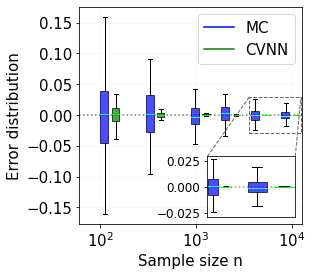

In [16]:
fig, ax = plt.subplots(figsize=(4,4))
# Display Boxplots
#tab = np.array(range(0, le))
bp_mc = ax.boxplot(val_mc,
                   positions=portion - (portion/7.5).astype(int),
                   sym='',widths=portion/6,patch_artist=True)
bp_cv = ax.boxplot(val_cv,
                   positions=portion + (portion/7.5).astype(int),
                   sym='',widths=portion/5,patch_artist=True)
for patch in bp_mc['boxes']:
    patch.set_alpha(0.7)
    patch.set_facecolor('blue')
    
for patch in bp_mc['medians']:
    patch.set_color('cyan')
    
for patch in bp_cv['boxes']:
    patch.set_alpha(0.7)
    patch.set_facecolor('green')
    
for patch in bp_cv['medians']:
    patch.set_color('lime')

plt.plot([], c='blue', label='MC')
plt.plot([], c='green', label='CVNN')
plt.xticks(ticks=portion,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Sample size n',fontsize=15)
plt.ylabel('Error distribution',fontsize=15)
plt.xscale('symlog')
plt.xlim(left=60)
ax.axhline(y=0, linestyle=':', color='k', alpha=0.5)



axins = zoomed_inset_axes(ax, 1.7, loc=4,borderpad=0.7)  # zoom = 3, location = 4 (lower right)

bpz_mc = axins.boxplot(val_mc,
               positions=portion - (portion/7.5).astype(int),
               sym='',widths=portion/5,patch_artist=True)

pos_cv_zoom = portion + (portion/7.5).astype(int)
bpz_cv = axins.boxplot(val_cv,
               positions=pos_cv_zoom,
               sym='',widths=portion/5,patch_artist=True)

for patch in bpz_mc['boxes']:
    patch.set_alpha(0.7)
    patch.set_facecolor('blue')
    
for patch in bpz_mc['medians']:
    patch.set_color('cyan')
    
for patch in bpz_cv['boxes']:
    patch.set_alpha(0.7)
    patch.set_facecolor('green')
    
for patch in bpz_cv['medians']:
    patch.set_color('lime')
# sub region of the original image
axins.set_xlim(3600, 12500)
if num=='prod_cos':
    axins.set_ylim(-0.001,0.001)
if num=='sum_cos':
    axins.set_ylim(-0.029,0.029)
if num=='exp':
    axins.set_ylim(-0.029,0.029)
for label in (axins.get_xticklabels() + axins.get_yticklabels()):
    label.set_fontsize(7)
axins.set_xticks([])
axins.tick_params(axis='y', which='major', labelsize=12)
mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.4",linestyle='--')
axins.axhline(y=0, linestyle=':', color='k', alpha=0.4)


ax.legend(loc='upper right',fontsize=15)

ax.grid(alpha=0.1)
#ax.set_yticks([-0.2,-0.15,-0.1,-0.05,0,
#                  0.05,0.1,0.15,0.2])
plt.show()